Covariate survival model examines how different variables affect the time until failure.

In [1]:
import pandas as pd
df = pd.read_csv('/Users/nechamab/Downloads/covariate_data.csv')
print(df.head())
print(df.columns)
print(df.shape) 

  DischargeTime  Temperature       Load Manufacturer
0     70.152 hr           69  19.768852            A
1     77.499 hr          111  30.462743            B
2     67.385 hr           11  32.053327            C
3     73.793 hr           53  29.684595            A
4     65.574 hr           31  23.999763            C
Index(['DischargeTime', 'Temperature', 'Load', 'Manufacturer'], dtype='object')
(1000, 4)


In [2]:
import numpy as np
from lifelines import WeibullAFTFitter
import matplotlib.pyplot as plt

In [3]:
# Need to add an event col, Mathworks also makes them all failures
df["Event"] = 1

In [4]:
# One hot encode Manufacturer col
df = pd.get_dummies(df, columns=['Manufacturer'], drop_first=False, dtype=float)

In [5]:
df['DischargeTime'] = df['DischargeTime'].str.replace(' hr', '', regex=False).astype(float)


In [6]:
df.dtypes

DischargeTime     float64
Temperature         int64
Load              float64
Event               int64
Manufacturer_A    float64
Manufacturer_B    float64
Manufacturer_C    float64
dtype: object

In [7]:
aft = WeibullAFTFitter()
aft.fit(df, duration_col='DischargeTime', event_col='Event')

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 0 right-censored observations>

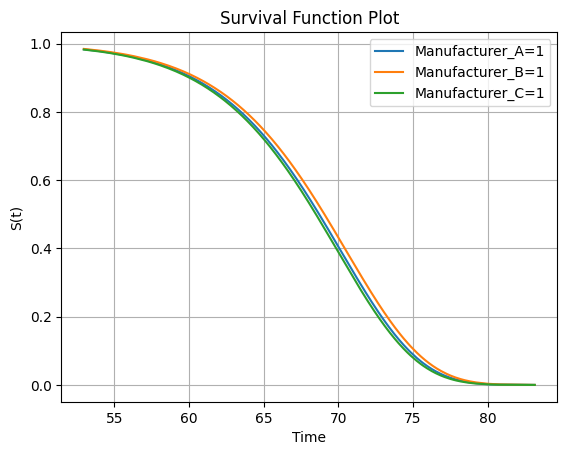

In [10]:
import matplotlib.pyplot as plt

for manufacturer in ['Manufacturer_A', 'Manufacturer_B', 'Manufacturer_C']:
    aft.plot_partial_effects_on_outcome(
        covariates=[manufacturer],
        values=[1],
        plot_baseline=False,
        label=manufacturer.split('_')[1]  # label just 'A', 'B', 'C'
    )

plt.title("Survival Function Plot")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid(True)
plt.legend()
plt.show()
